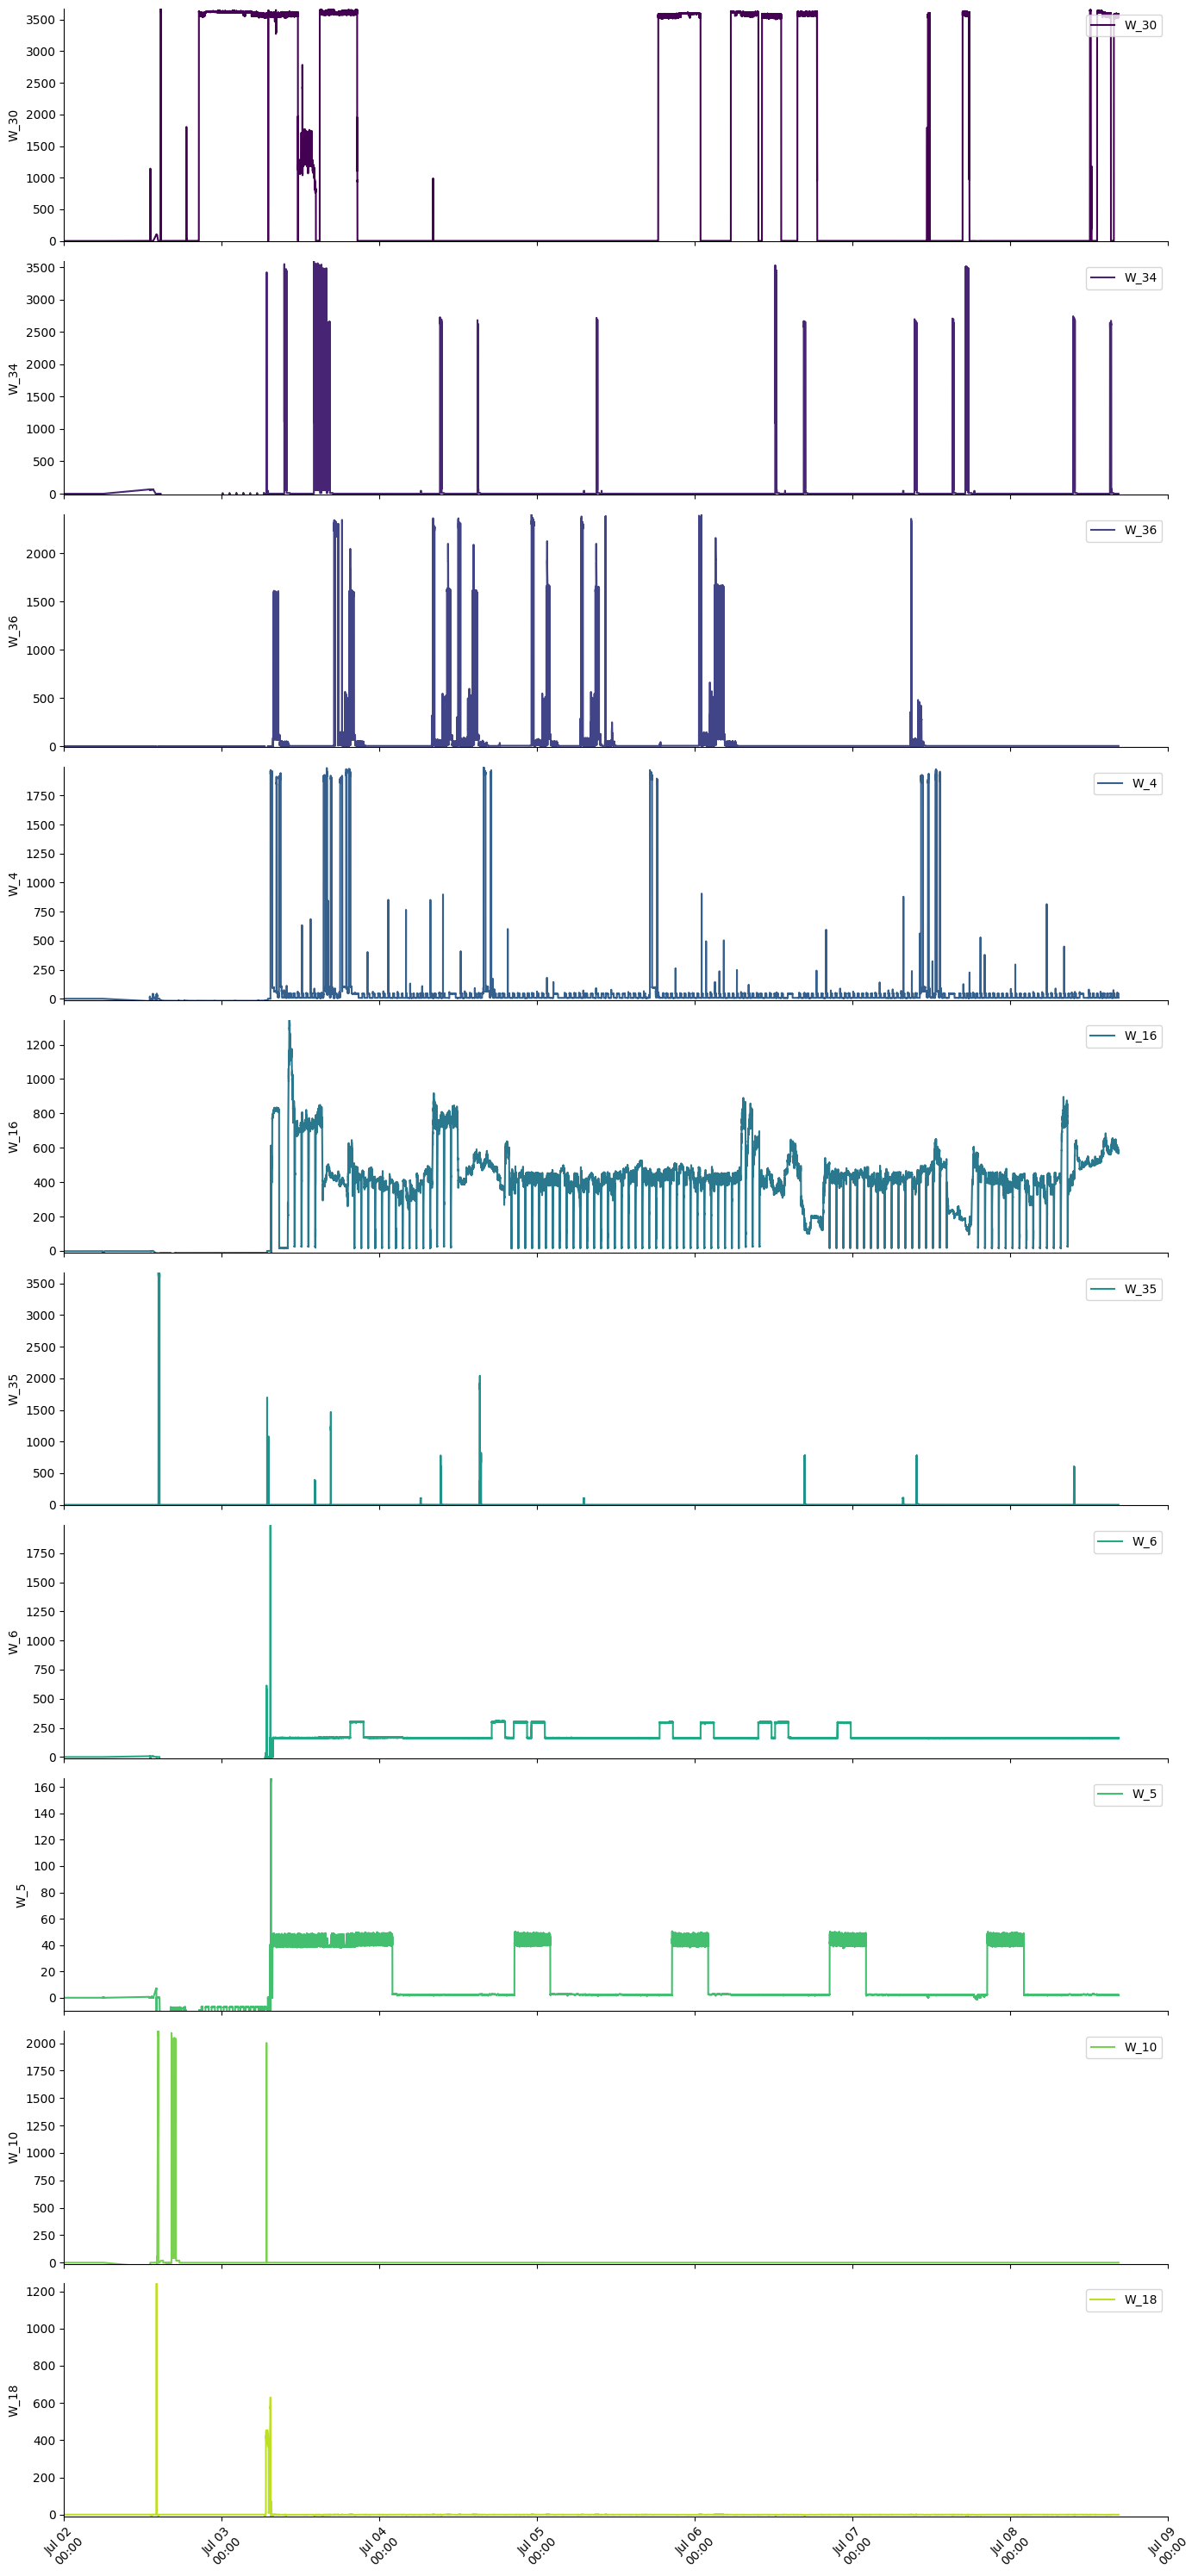

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# ---- Load or simulate your DataFrame ----
# Replace this with your actual DataFrame loading if needed
df = pd.read_hdf("emon_data.h5", key="power")

# ---- Ensure timestamp is datetime ----
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# ---- Compute most variable columns ----
n = 10  # number of most variable columns to plot
variability = df.drop(columns="timestamp").std().sort_values(ascending=False)
top_columns = variability.head(n).index.tolist()

# ---- Plot setup ----
fig, axs = plt.subplots(n, 1, figsize=(14, 3 * n), sharex=True)
cmap = plt.get_cmap("viridis")

start_date = datetime.datetime(2025, 7, 2)
end_date = datetime.datetime(2025, 7, 9)

for i, col in enumerate(top_columns):
    ax = axs[i]
    color = cmap(i / n)
    ax.plot(df["timestamp"], df[col], color=color, label=col)
    ax.set_xlim(start_date, end_date)

    ax.set_ylabel(col)
    ax.set_ylim(-10, max(df[col]))
    ax.legend(loc="upper right")

    # Remove top and right box lines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# ---- X-axis formatting ----
axs[-1].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter("%b %d\n%H:%M"))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
